<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96800 entries, 0 to 96799
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   xAcc    96800 non-null  float64
 1   yAcc    96800 non-null  float64
 2   zAcc    96800 non-null  float64
 3   xGyro   96800 non-null  float64
 4   yGyro   96800 non-null  float64
 5   zGyro   96800 non-null  float64
 6   label   96800 non-null  object 
dtypes: float64(6), object(1)
memory usage: 5.2+ MB
None
               xAcc          yAcc          zAcc         xGyro         yGyro  \
count  96800.000000  96800.000000  96800.000000  96800.000000  96800.000000   
mean       7.201229     -1.341302     -3.059421     -1.226996     -0.231135   
std        3.009094      3.049660      5.368511     35.448655     25.118186   
min      -39.240000    -39.240000    -39.240000   -483.400000   -437.810000   
25%        5.740000     -2.900000     -6.260000    -13.670000     -6.160000   
50%        7.040000     -1.3

C:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


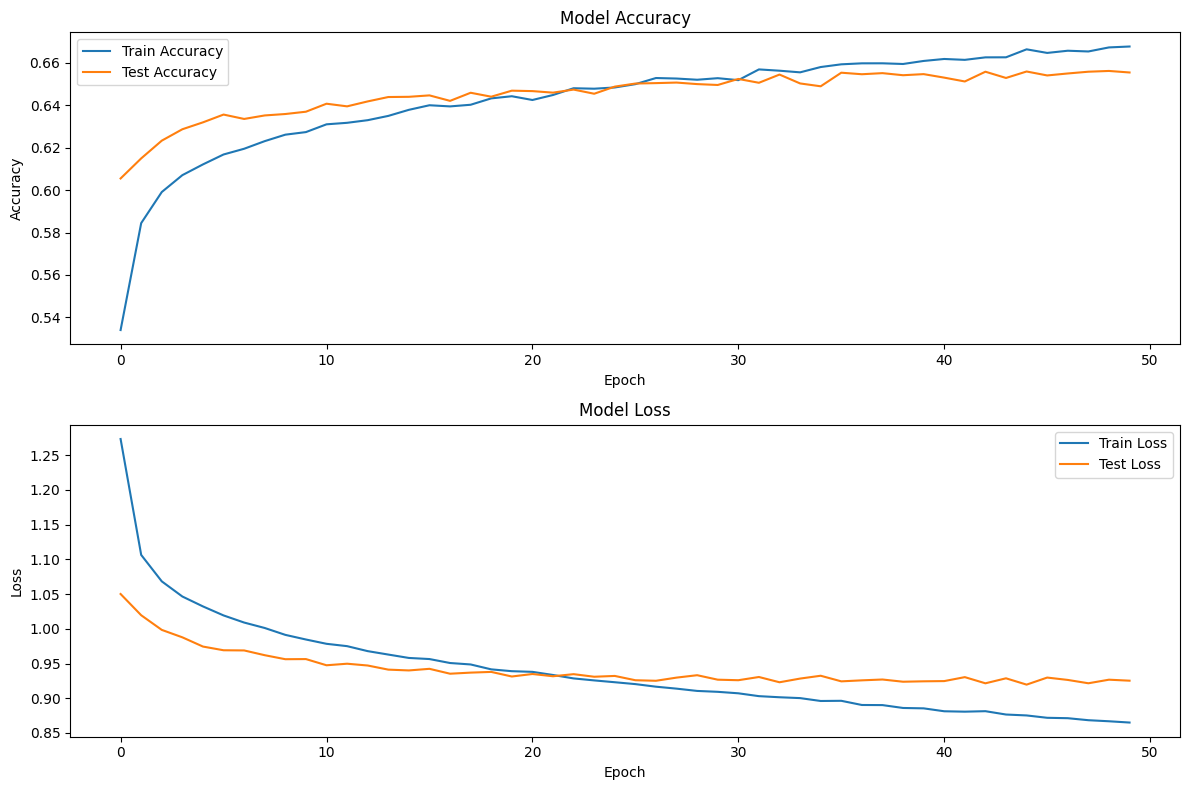

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import joblib  # Để lưu scaler và label_encoder

# Đọc dữ liệu
df = pd.read_csv("fall_dataset.csv")

# Hiển thị thông tin cơ bản của dữ liệu
print(df.info())
print(df.describe())

# Tiền xử lý dữ liệu
# Giả sử 'label' là cột mục tiêu và các cột còn lại là đặc trưng
X = df.drop('label', axis=1).values
y = df['label'].values

# Mã hóa các nhãn chuỗi thành số
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Lưu LabelEncoder
joblib.dump(label_encoder, 'label_encoder.pkl')

# Chuyển đổi nhãn thành dạng one-hot
y = to_categorical(y)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lưu scaler
joblib.dump(scaler, 'scalerFall.pkl')

# Thêm trục kênh cho dữ liệu để dùng với Conv1D
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Kiểm tra kích thước dữ liệu đầu vào
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

# Xây dựng mô hình CNN
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2, padding='same'),
    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2, padding='same'),
    Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2, padding='same'),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

# Compile mô hình với learning rate thấp hơn
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình với số epoch lớn hơn
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Lưu mô hình
model.save('fall_detection_model.h5')

# Vẽ biểu đồ kết quả huấn luyện
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
# Biểu đồ độ chính xác
axs[0].plot(history.history['accuracy'], label='Train Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Test Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
# Biểu đồ hàm mất mát
axs[1].plot(history.history['loss'], label='Train Loss')
axs[1].plot(history.history['val_loss'], label='Test Loss')
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()


In [1]:
import joblib
import tensorflow as tf



# Lưu scaler đã huấn luyện
joblib.dump(scaler, 'scalerFall.pkl')
print("Scaler đã được lưu.")


NameError: name 'scaler' is not defined

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu kiểm tra
test_df = pd.read_csv("test_dataset.csv")

# Tiền xử lý dữ liệu kiểm tra
X_test_new = test_df.values

# Chuẩn hóa dữ liệu kiểm tra
X_test_new = scaler.transform(X_test_new)

# Thêm trục kênh cho dữ liệu để dùng với Conv1D
X_test_new = X_test_new[..., np.newaxis]

# Dự đoán nhãn cho dữ liệu kiểm tra
y_pred = model.predict(X_test_new)

# Chuyển đổi nhãn dự đoán từ dạng one-hot trở về nhãn gốc
y_pred_labels = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))

# Thêm nhãn dự đoán vào dữ liệu kiểm tra
test_df['predicted_label'] = y_pred_labels

# In kết quả ra màn hình
print(test_df)


FileNotFoundError: [Errno 2] No such file or directory: 'test_dataset.csv'